# British Airways Virtual Experience Task 2 - Ayaan Danish


## 1. Dataset EDA

### Importing libraries

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [155]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### Shows number of unique values for each column

In [156]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

### Shows some key statistics about the data such as mean and quartiles

In [157]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### Counts the number of null values for each column, this dataset has none

In [158]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Shows some important info about each column

In [159]:
df.info() #TODO: convert categorical to numeric if need arises

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Making a new dataframe that contains only the numeric data from the dataset, for plotting

In [160]:
numericData = df.drop(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], axis=1)
numericData.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


### Plots the correlation of each column with each other as a heatmap
A lighter value means a higher correlation

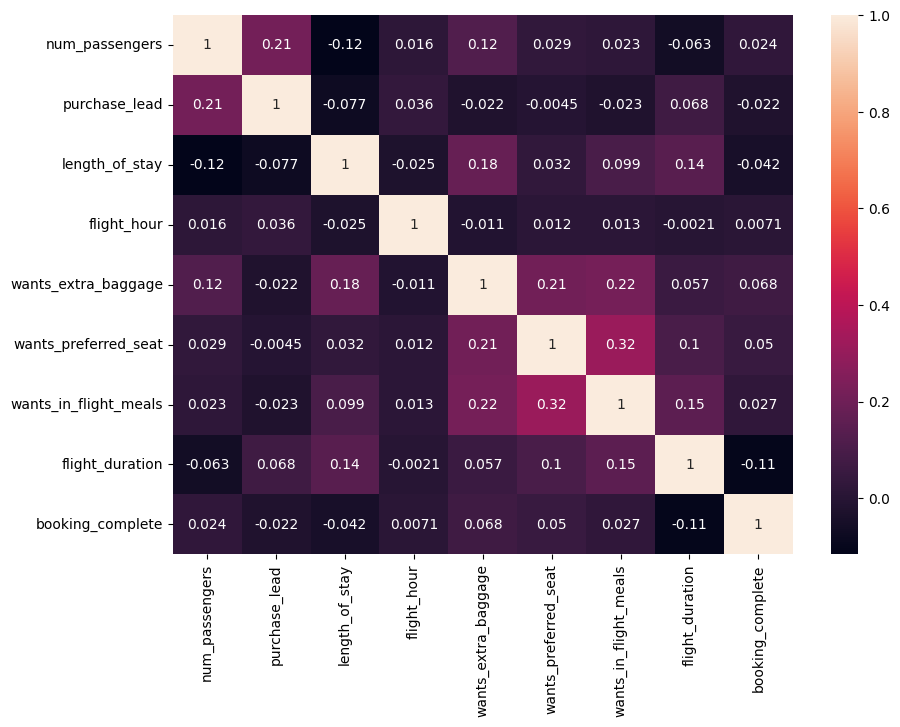

In [161]:
corr = numericData.corr()
plt.figure(figsize=(10, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

### Plot the frequency distribution of the Completed Bookings column
We can see that majority of the bookings are left incomplete

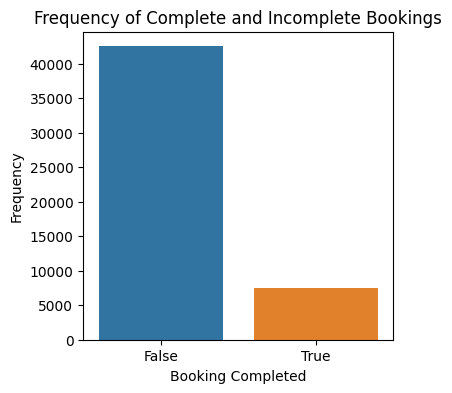

In [162]:
# Set the data and column name
data = df['booking_complete']

# Count the frequencies of each unique value
counts = data.value_counts()

plt.figure(figsize=(4,4))

# Plot the frequencies as separate bars
sns.barplot(x=counts.index, y=counts.values)

# Set plot labels and title
plt.xlabel('Booking Completed')
plt.xticks([0, 1], ['False', 'True'])
plt.ylabel('Frequency')
plt.title('Frequency of Complete and Incomplete Bookings')

# Display the plot
plt.show()


### Density plots of the purchase lead, flight duration and length of stay

Text(0.5, 0, 'Flight Duration (hours)')

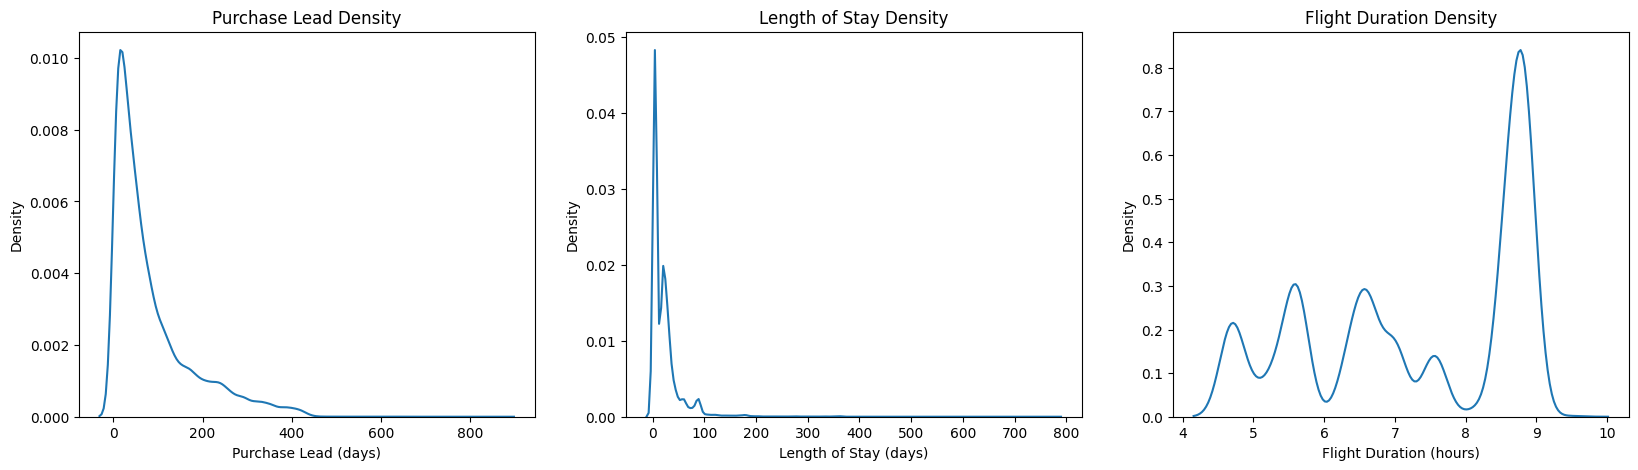

In [163]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.kdeplot(data=df['purchase_lead'], ax=axs[0])
sns.kdeplot(data=df['length_of_stay'], ax=axs[1])
sns.kdeplot(data=df['flight_duration'], ax=axs[2])

axs[0].set_title('Purchase Lead Density')
axs[0].set_xlabel('Purchase Lead (days)')

axs[1].set_title('Length of Stay Density')
axs[1].set_xlabel('Length of Stay (days)')

axs[2].set_title('Flight Duration Density')
axs[2].set_xlabel('Flight Duration (hours)')


## 2. Dataset Preparation

We can see that there are some categorical columns that have only a few unique values, we so can convert them to numeric form

In [164]:
print(df.nunique())

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64


#### Creating a mapping for the sales_channel column and replacing its column

In [165]:
salesChannelMapping = {
    'Internet': 1,
    'Mobile': 0,
}

df['sales_channel'] = df['sales_channel'].map(salesChannelMapping)

#### Creating a mapping for the trip_type column and replacing its column

In [166]:
tripTypeMapping = {
    'RoundTrip': 0,
    'CircleTrip': 1,
    'OneWay': 2
}

df['trip_type'] = df['trip_type'].map(tripTypeMapping)

#### Creating a mapping for the flight_day column and replacing its column

In [167]:
flightDayMapping = {
    'Mon': 0,
    'Tue': 1,
    'Wed': 2,
    'Thu': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6
}

df['flight_day'] = df['flight_day'].map(flightDayMapping)


In [168]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,5,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,0,112,20,3,5,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,0,243,22,17,2,AKLDEL,India,1,1,0,5.52,0
3,1,1,0,96,31,4,5,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,0,68,22,15,2,AKLDEL,India,1,0,1,5.52,0


There are still 2 categorical columns left, but they have a really high cardinality so we can't encode them manually. We will perform label encoding on these in the next section.

In [169]:
from sklearn import preprocessing

In [170]:

label_encoder = preprocessing.LabelEncoder()
  
df['route']= label_encoder.fit_transform(df['route'])
df['booking_origin']= label_encoder.fit_transform(df['booking_origin'])

## 3. Random Forest Classification Model Training

### Importing libraries

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import numpy as np

### Separate the target variable as a separate Series

In [172]:
y = df['booking_complete']

### Separate the features as a separate Dataframe

In [173]:
x = df.drop(['booking_complete'], axis=1)

### Create a test-train split to train and test the model on

In [174]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

### Train the model on the training data using 6 CPUs

In [175]:
rf = RandomForestClassifier(n_jobs=6)
rf.fit(xTrain, yTrain)

RandomForestClassifier(n_jobs=6)

## 4. Model Evaluation and Feature Ranking

### Evaluate model accuracy score

In [176]:
# Make predictions on the testing data
yPred = rf.predict(xTest)

# Evaluate the performance of the model
accuracy = accuracy_score(yTest, yPred)
print(f'Model accuracy: {round(accuracy * 100, 2)}%')

Model accuracy: 85.34%


### Plot model confusion matrix

([<matplotlib.axis.YTick at 0x2263d4b16d0>,
 [Text(0, 0.5, 'Not Booked'), Text(0, 1.5, 'Booked')])

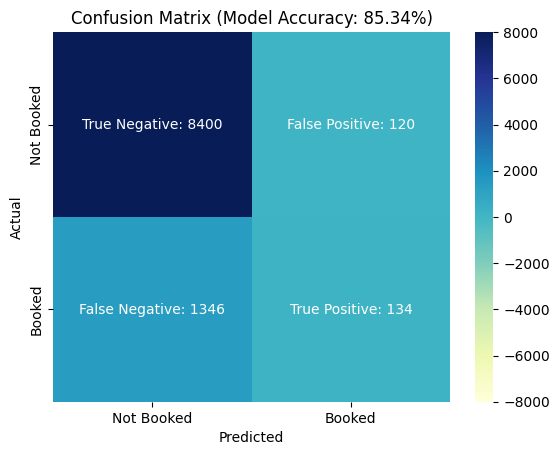

In [181]:
#Obtain the confusion matrix
cm = confusion_matrix(yTest, yPred)


annot = [[f'True Negative: {cm[0][0]}', f'False Positive: {cm[0][1]}'],
          [f'False Negative: {cm[1][0]}', f'True Positive: {cm[1][1]}']]

# Create a heatmap for the confusion matrix
ax = sns.heatmap(cm, annot=annot, cmap="YlGnBu", fmt='', vmin=-8000, vmax= 8000)

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Model Accuracy: {round(accuracy_score(yTest, yPred) * 100, 2)}%)")
plt.xticks([0.5,1.5], ["Not Booked", "Booked"])
plt.yticks([0.5, 1.5], ["Not Booked", "Booked"])

### Plot model ROC Curve

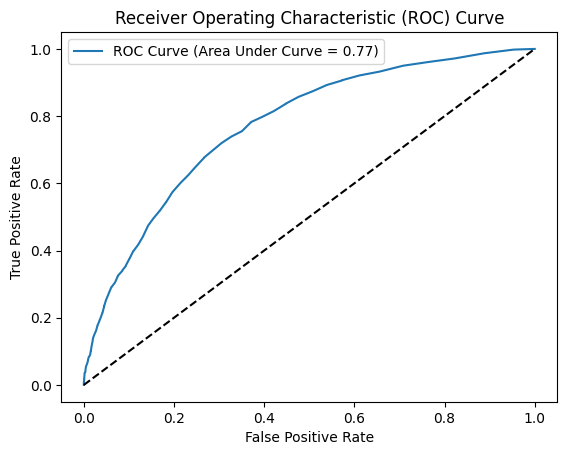

In [182]:
yPredProba = rf.predict_proba(xTest)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(yTest, yPredProba)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(yTest, yPredProba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (Area Under Curve = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classification
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()


### Rank model features by order of importance and plot

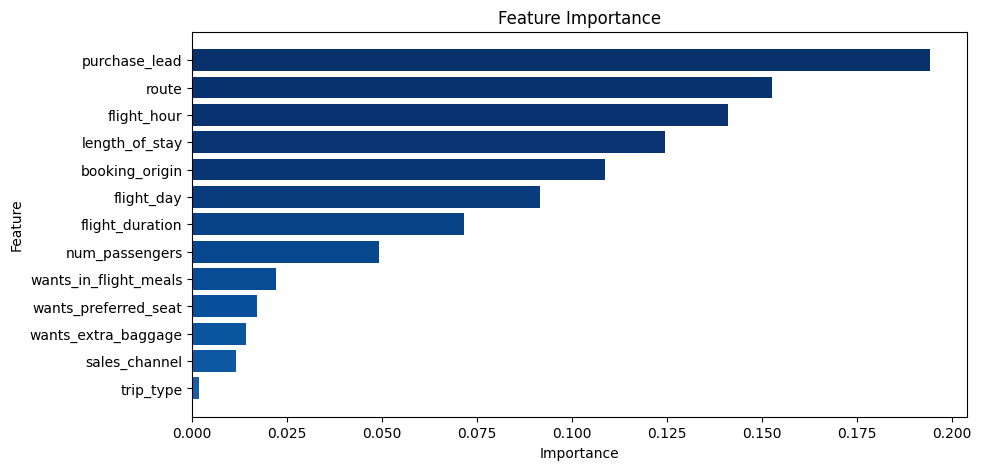

In [179]:
feature_names = df.drop(['booking_complete'], axis=1).columns 

# Get feature importances from the trained random forest model
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Reverse the order of feature importances and feature names
reversed_indices = np.arange(len(sorted_importances) - 1, -1, -1)
reversed_importances = sorted_importances[reversed_indices]
reversed_feature_names = sorted_feature_names[reversed_indices]

# Define a custom colormap for the bars with darker shades
colormap = plt.colormaps.get_cmap('Blues_r')

fig = plt.figure(figsize=(10, 5))

# Create a horizontal bar plot with rotated labels
plt.barh(range(len(importances)), reversed_importances, color=colormap(sorted_importances))
plt.yticks(range(len(importances)), reversed_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show the plot
plt.show()
